In [1]:
!pip install pillow

### 유튜브 영상 이미지 크롤링

In [1]:
import requests
import time
from selenium import webdriver
from PIL import Image as pil

#### 1. 이미지 스크린샷

In [4]:
url = 'https://www.youtube.com/watch?v=yL2xVs6uI0s&t=30s'
driver = webdriver.Chrome()
driver.get(url)

In [5]:
driver.save_screenshot('datas/screenshot.png')
driver.quit()

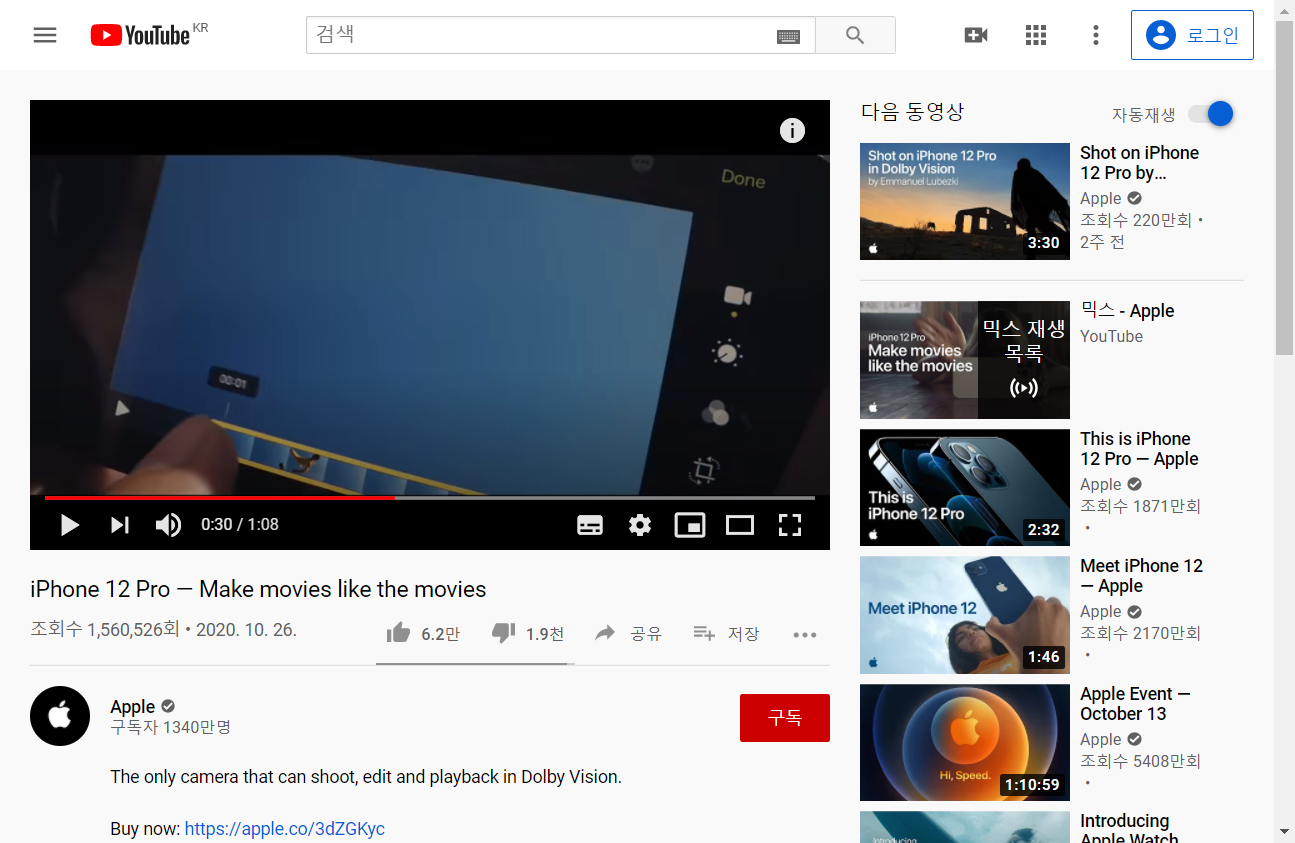

In [6]:
pil_img = pil.open('datas/screenshot.png')
pil_img

#### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [7]:
driver = webdriver.Chrome()
driver.get(url)

In [9]:
element = driver.find_element_by_css_selector('#movie_player')
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 360, 'width': 640}


In [12]:
# area 변경: 해상도에 따라 비율이 달라지기 때문에 비율을 맞춰줘야함
left = location['x'] * 1.3
top = location['y'] * 1.3
right = left + size['width'] * 1.3
bottom = top + size['height'] * 1.3
area = (left, top, right, bottom)
area

(31.200000000000003, 104.0, 863.2, 572.0)

#### 3. 이미지를 pillow로 잘라주기

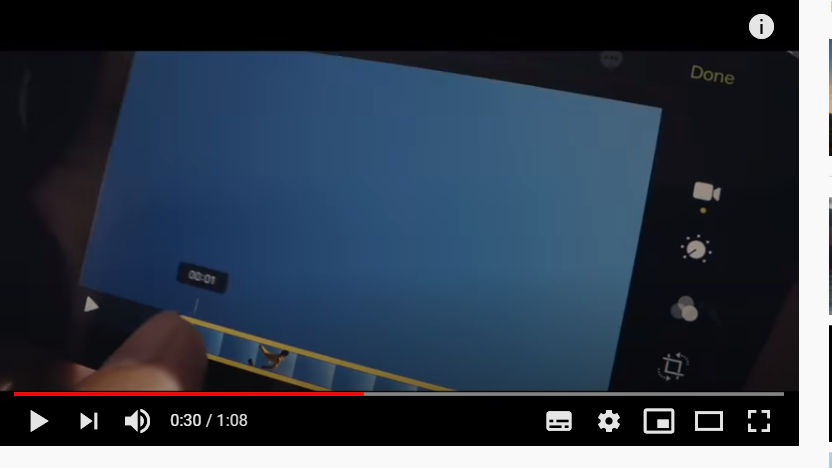

In [13]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [14]:
# 이미지 저장
pil_element_img.save('datas/screenshot_element.png')

In [15]:
!ls datas

screenshot.png
screenshot_element.png


#### 4. 썸네일 만들기
- 원본 이미지를 다양한 사이즈로 축소

In [16]:
pil_element_img.size

(832, 468)

(284, 160)


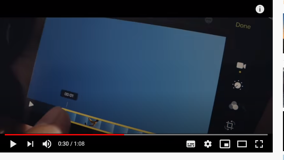

In [17]:
pil_element_img.thumbnail((320, 160))
print(pil_element_img.size)
pil_element_img

### fake useragent

In [18]:
from fake_useragent import UserAgent

In [19]:
# 크롬 드라이버의 agent 확인
driver = webdriver.Chrome()
agent = driver.execute_script('return navigator.userAgent;')
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36


In [21]:
# userAgent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script('return navigator.userAgent;')
driver.quit()
print(agent)

Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2656.18 Safari/537.36


### headless
- 브라우저를 화면에 띄우지 않고 메모리상에서만 실행하는 방법

In [22]:
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome(options=options)
driver.get('https://fastcampus.co.kr/')
print(driver.title)
driver.quit()

커리어 성장을 위한 최고의 실무교육 아카데미 | 패스트캠퍼스


In [29]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = 'datas/{}'.format(title), 0
    with open(save_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [30]:
url = 'https://www.youtube.com/watch?v=yL2xVs6uI0s'

In [31]:
# 다운로드 받을 수 있응 url
link = 'https://r2---sn-2p35oxu-wvbl.googlevideo.com/videoplayback?expire=1603952776&ei=KAyaX5vfComl1gLH256AAw&ip=103.26.213.117&id=o-AH8Uld08LPz5Ml-IaOAU2yCjJLR6Qn5jcqreFJU7kvJU&itag=22&source=youtube&requiressl=yes&mh=cX&mm=31%2C29&mn=sn-2p35oxu-wvbl%2Csn-2uuxa3vh-jb3l&ms=au%2Crdu&mv=m&mvi=2&pl=24&initcwndbps=492500&vprv=1&mime=video%2Fmp4&ratebypass=yes&dur=68.127&lmt=1603790126079664&mt=1603931072&fvip=6&beids=9466585&c=WEB&txp=5535432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRgIhALQoGTWpEZK4JLWaUARHkBWhA4gHe3coYWK6qx0o9BoXAiEA_8ssxTU8UPOts7xEiLKN3ieEuLiqPGDajwn20getDb8%3D&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRQIhAJFrXCOs4c2xUBYnLOimFB2Qdw859Izp32AiQpHCv_AfAiBs5zN7F7ecdq5_kt2vaiEaqdaguNNTKGf3VSWr9lMr_w%3D%3D&title=iPhone%2012%20Pro%20%E2%80%94%20Make%20movies%20like%20the%20movies'

In [33]:
title = 'Apple_iPhone12'
size = download(title, link)
print('{} Mb'.format(round(size/1024/1024,2)))

4.98 Mb
